In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

In [2]:
df_data = pd.read_csv('blog_vid_5_new.csv')

In [3]:
df = df_data[df_data['reply_count'] > 0]

In [4]:
df['index'] = pd.to_numeric(df['index'], errors='coerce')

/var/folders/00/4_gxgzyx7131tsyx_ymz0hsm0000gn/T/ipykernel_17480/1128875700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = pd.to_numeric(df['index'], errors='coerce')


In [5]:
df.dropna(subset=['index'], inplace=True)

/var/folders/00/4_gxgzyx7131tsyx_ymz0hsm0000gn/T/ipykernel_17480/663942010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['index'], inplace=True)


In [6]:
df = df.reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7838 non-null   object 
 1   author_name  7838 non-null   object 
 2   text         7838 non-null   object 
 3   reply_count  7838 non-null   float64
 4   top_level    7838 non-null   object 
 5   index        7838 non-null   float64
 6   publishedAt  7838 non-null   object 
 7   updateAt     7838 non-null   object 
 8   likeCount    7838 non-null   float64
dtypes: float64(3), object(6)
memory usage: 551.2+ KB


 #### Тип данных комментария

In [8]:
df['text'] = df['text'].astype(str)
df['initial_comment'] = df['text']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7838 non-null   object 
 1   author_name      7838 non-null   object 
 2   text             7838 non-null   object 
 3   reply_count      7838 non-null   float64
 4   top_level        7838 non-null   object 
 5   index            7838 non-null   float64
 6   publishedAt      7838 non-null   object 
 7   updateAt         7838 non-null   object 
 8   likeCount        7838 non-null   float64
 9   initial_comment  7838 non-null   object 
dtypes: float64(3), object(7)
memory usage: 612.5+ KB


In [10]:
train_corpus = df['text']

In [11]:
train_corpus

0       Господи, какие же слабые люди) \nДа и много я ...
1       Какое вообще значение имеет, когда она уехала ...
2       Очень много говорит о свободе уехавшие. У меня...
3       Если высказывания без конкретных оскорблений, ...
4       Меня всегда поражает Юрий Дудь, он говорит про...
                              ...                        
7833                       @@sanyaZakonебать «величайшая»
7834                                      Из лесу вышел?)
7835    @@donpedro290 для тебя получается все из Леса ...
7836    Юр, мы за Украину, желаем ей победы в войне и ...
7837    Кто мы то, ты здесь один. Нет, теперь ты будеш...
Name: text, Length: 7838, dtype: object

In [12]:
comment_lengths = train_corpus.apply(len)

In [13]:
df['length'] = comment_lengths

In [14]:
#pip install emoji

In [15]:
import emoji

def count_emojis(comment):
    emoji_count = sum(1 for token in comment if emoji.emoji_count(token))
    return emoji_count

def count_emojis_in_comments(tokenized_comments):
    emoji_counts = []
    for comment in tokenized_comments:
        emoji_count = count_emojis(comment)
        emoji_counts.append(emoji_count)
    return emoji_counts


emoji_counts = count_emojis_in_comments(train_corpus)

df['emoji_count'] = emoji_counts


## Токенизация и предобработка комментариев 

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words.extend(['br', 'її', 'quot', 'www', 'href', 'https', 'http', 'ru', '\n'])
stop_words.extend(stopwords.words('english'))

In [17]:
#pip install spacy

In [18]:
import spacy
from gensim.utils import simple_preprocess
nlp = spacy.load("ru_core_news_sm")

def lemma(word):
    for w in nlp(word):
        return w.lemma_
def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([lemma(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

def preprocess(comment):
    # Tokenize and lemmatize
    tokens = [token.lemma_ for token in nlp(comment)]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens).replace('\n', ' ')


In [19]:
tokenized_text = [word_tokenize(tok) for tok in train_corpus]

In [20]:
import string

def calculate_punctuation_percentage(comment):
    total_chars = len(comment)
    punctuation_count = sum(1 for char in comment if char in string.punctuation)
    return (punctuation_count / total_chars) if total_chars > 0 else 0

def calculate_punctuation_percentages(tokenized_comments):
    percentages = []
    for comment in tokenized_comments:
        punctuation_percentage = calculate_punctuation_percentage(comment)
        percentages.append(punctuation_percentage)
    return percentages

In [21]:
punctuation_percentages = calculate_punctuation_percentages(tokenized_text)

df['punct_perc'] = punctuation_percentages
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7838 non-null   object 
 1   author_name      7838 non-null   object 
 2   text             7838 non-null   object 
 3   reply_count      7838 non-null   float64
 4   top_level        7838 non-null   object 
 5   index            7838 non-null   float64
 6   publishedAt      7838 non-null   object 
 7   updateAt         7838 non-null   object 
 8   likeCount        7838 non-null   float64
 9   initial_comment  7838 non-null   object 
 10  length           7838 non-null   int64  
 11  emoji_count      7838 non-null   int64  
 12  punct_perc       7838 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 796.2+ KB


In [22]:
tokenized_text

[['Господи',
  ',',
  'какие',
  'же',
  'слабые',
  'люди',
  ')',
  'Да',
  'и',
  'много',
  'я',
  'таких',
  'знаю',
  ',',
  'кто',
  '«',
  'против',
  'войны',
  ',',
  'понимали',
  ',',
  'что',
  'жить',
  'тут',
  'не',
  'сможем',
  'больше',
  '»',
  ',',
  'но',
  'уехали',
  'они',
  'почему-то',
  'только',
  'с',
  'началом',
  'мобилизации',
  ')',
  'Срут',
  'в',
  'уши',
  ',',
  'а',
  'вы',
  'и',
  'рады',
  'Против',
  'войны',
  '?',
  'Хорошо',
  ',',
  '24',
  'февраля',
  '2022',
  'собрала',
  'вещи',
  ',',
  '25',
  'уехала',
  ',',
  'можешь',
  'поехать',
  'на',
  'Украину',
  'и',
  'помогать',
  'там',
  ',',
  'можешь',
  'абстрагироваться',
  'и',
  'не',
  'касаться',
  'этой',
  'темы',
  ',',
  'спокойно',
  'жить',
  'за',
  'рубежом',
  ',',
  'а',
  'можешь',
  'остаться',
  'в',
  'РФ',
  ',',
  'но',
  'не',
  'заливать',
  'потом',
  ',',
  'о',
  'том',
  ',',
  'как',
  'ты',
  'хотела',
  'с',
  'самого',
  'начала',
  'уехать'],
 ['К

In [23]:
data_ready = process_words(tokenized_text)

In [24]:
data_ready

[['господь',
  'слабый',
  'человек',
  'знать',
  'против',
  'война',
  'понимать',
  'жить',
  'смочь',
  'уехать',
  'почему',
  'начало',
  'мобилизация',
  'срут',
  'ухо',
  'рад',
  'против',
  'война',
  'февраль',
  'собрать',
  'вещь',
  'уехать',
  'мочь',
  'поехать',
  'украина',
  'помогать',
  'мочь',
  'касаться',
  'тема',
  'спокойно',
  'жить',
  'рубеж',
  'мочь',
  'остаться',
  'рф',
  'заливать',
  'хотеть',
  'самого',
  'начать',
  'уехать'],
 ['вообще',
  'значение',
  'иметь',
  'уехать',
  'уехать',
  'вообще',
  'позиция',
  'понятный',
  'самого',
  'начать'],
 ['очень',
  'говорить',
  'свобода',
  'уехать',
  'вопрос',
  'свобода',
  'это',
  'сидеть',
  'страна',
  'поливать',
  'свой',
  'президент',
  'думать',
  'каждый',
  'гражданин',
  'германия',
  'сша',
  'открыть',
  'вести',
  'против',
  'свой',
  'страна',
  'свой',
  'президент',
  'сидеть',
  'свой',
  'страна',
  'устраивать',
  'демонстрация',
  'писать',
  'лозунг',
  'пост',
  'пройт

In [25]:
with open('my_list_file2.py', 'w') as file:
    file.write(f'my_list = {data_ready}')

In [26]:
file.close()

In [27]:
from my_list_file import my_list

In [28]:
df['text'] = data_ready 
#df['text'] = my_list_file.my_list

In [29]:
len(df['text'][0])

40

In [30]:
df_filtered = df[df['text'].apply(lambda x: len(x)>0)]
df_filtered = df_filtered.reset_index(drop=True)

In [31]:
#df_filtered['publishedAt'] = pd.to_datetime(df_filtered['publishedAt'])
#end_time = '2024-01-07T23:59:59Z'

In [32]:
#filtered_data = df_filtered[(df_filtered['publishedAt'] <= end_time)]

In [33]:
#filtered_data.info()

In [34]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7710 non-null   object 
 1   author_name      7710 non-null   object 
 2   text             7710 non-null   object 
 3   reply_count      7710 non-null   float64
 4   top_level        7710 non-null   object 
 5   index            7710 non-null   float64
 6   publishedAt      7710 non-null   object 
 7   updateAt         7710 non-null   object 
 8   likeCount        7710 non-null   float64
 9   initial_comment  7710 non-null   object 
 10  length           7710 non-null   int64  
 11  emoji_count      7710 non-null   int64  
 12  punct_perc       7710 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 783.2+ KB


In [35]:
df_filtered['top_level'] = df_filtered['top_level'].astype(int)

Получили окончательный датасет, на основе которого будем обучать модель

Отсеим ветки, в которых не осталось основного комментария

In [36]:
filtered_idxs = df_filtered[df_filtered['top_level'] == 0]['index'].unique()

In [37]:
df_filtered = df_filtered[df_filtered['index'].isin(filtered_idxs)]
df_filtered = df_filtered.reset_index(drop=True)

In [38]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706 entries, 0 to 7705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7706 non-null   object 
 1   author_name      7706 non-null   object 
 2   text             7706 non-null   object 
 3   reply_count      7706 non-null   float64
 4   top_level        7706 non-null   int64  
 5   index            7706 non-null   float64
 6   publishedAt      7706 non-null   object 
 7   updateAt         7706 non-null   object 
 8   likeCount        7706 non-null   float64
 9   initial_comment  7706 non-null   object 
 10  length           7706 non-null   int64  
 11  emoji_count      7706 non-null   int64  
 12  punct_perc       7706 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 782.8+ KB


Отсеим ветки, в которых остался только один комментарий, причем нам не важно, основной это комментрий или нет, так как до этого мы отсеили все ветки, в которых отсутствует основной комментарий, значит если комментариев два или более, один из них основной

In [39]:
df_filtered = df_filtered[df_filtered.groupby('index')['index'].transform('count') > 1]
df_filtered = df_filtered.reset_index(drop=True)

In [40]:
df_filtered.info() #RangeIndex: 7583 entries, 0 to 7582

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7657 non-null   object 
 1   author_name      7657 non-null   object 
 2   text             7657 non-null   object 
 3   reply_count      7657 non-null   float64
 4   top_level        7657 non-null   int64  
 5   index            7657 non-null   float64
 6   publishedAt      7657 non-null   object 
 7   updateAt         7657 non-null   object 
 8   likeCount        7657 non-null   float64
 9   initial_comment  7657 non-null   object 
 10  length           7657 non-null   int64  
 11  emoji_count      7657 non-null   int64  
 12  punct_perc       7657 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 777.8+ KB


In [41]:
df_filtered = df_filtered.reset_index(drop=True)

In [42]:
df_filtered['index'] = df_filtered['index'].astype(int)

In [43]:
thread_idxs = df_filtered['index'].unique()
thread_idxs

array([  13,   38,   65, ..., 8326, 8341, 8344])

In [44]:
df_filtered[df_filtered['index'] == 146]

,Unnamed: 0,author_name,text,reply_count,top_level,index,publishedAt,updateAt,likeCount,initial_comment,length,emoji_count,punct_perc


In [45]:
len(thread_idxs)

1894

In [46]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

In [47]:
#df_filtered = pd.read_csv('output_vid_5.csv')

In [48]:
list(thread_idxs)

[13,
 38,
 65,
 71,
 79,
 99,
 109,
 147,
 185,
 188,
 197,
 206,
 220,
 221,
 226,
 234,
 239,
 242,
 247,
 250,
 260,
 261,
 262,
 267,
 274,
 277,
 280,
 283,
 285,
 286,
 290,
 302,
 305,
 313,
 317,
 324,
 339,
 341,
 346,
 349,
 356,
 357,
 362,
 371,
 372,
 384,
 395,
 401,
 413,
 424,
 425,
 434,
 438,
 455,
 456,
 459,
 464,
 477,
 483,
 488,
 490,
 491,
 493,
 494,
 508,
 511,
 512,
 515,
 521,
 531,
 534,
 535,
 536,
 545,
 547,
 550,
 552,
 555,
 561,
 562,
 568,
 583,
 588,
 597,
 598,
 609,
 627,
 640,
 649,
 652,
 653,
 656,
 663,
 665,
 669,
 675,
 685,
 691,
 692,
 699,
 703,
 722,
 724,
 726,
 730,
 732,
 733,
 735,
 737,
 739,
 740,
 744,
 746,
 748,
 751,
 758,
 760,
 764,
 765,
 769,
 770,
 777,
 779,
 787,
 790,
 796,
 802,
 805,
 806,
 809,
 815,
 821,
 823,
 828,
 829,
 830,
 831,
 834,
 840,
 844,
 846,
 847,
 852,
 854,
 860,
 861,
 863,
 867,
 871,
 873,
 880,
 897,
 901,
 903,
 905,
 908,
 910,
 914,
 916,
 918,
 919,
 928,
 930,
 937,
 939,
 940,
 941,
 952

In [49]:
thread2idx_list = []
for thread_idx in thread_idxs:
    print(df_filtered[df_filtered['index']==thread_idx][['index']])
    idxs_list = list(df_filtered[df_filtered['index']==thread_idx].index)
    thread2idx_list.append(idxs_list)

   index
0     13
1     13
   index
2     38
3     38
   index
4     65
5     65
   index
6     71
7     71
8     71
    index
9      79
10     79
    index
11     99
12     99
    index
13    109
14    109
    index
15    147
16    147
    index
17    185
18    185
19    185
    index
20    188
21    188
    index
22    197
23    197
    index
24    206
25    206
    index
26    220
27    220
    index
28    221
29    221
30    221
31    221
    index
32    226
33    226
    index
34    234
35    234
36    234
37    234
38    234
39    234
40    234
    index
41    239
42    239
43    239
44    239
    index
45    242
46    242
    index
47    247
48    247
    index
49    250
50    250
    index
51    260
52    260
    index
53    261
54    261
    index
55    262
56    262
    index
57    267
58    267
59    267
60    267
    index
61    274
62    274
63    274
64    274
    index
65    277
66    277
    index
67    280
68    280
69    280
    index
70    283
71    283
72    283
   

     index
690   1025
691   1025
692   1025
693   1025
694   1025
     index
695   1028
696   1028
697   1028
698   1028
699   1028
700   1028
701   1028
702   1028
703   1028
704   1028
705   1028
706   1028
     index
707   1032
708   1032
709   1032
     index
710   1035
711   1035
     index
712   1038
713   1038
     index
714   1045
715   1045
     index
716   1052
717   1052
     index
718   1053
719   1053
     index
720   1054
721   1054
722   1054
723   1054
724   1054
725   1054
726   1054
727   1054
     index
728   1055
729   1055
     index
730   1061
731   1061
     index
732   1062
733   1062
734   1062
735   1062
     index
736   1068
737   1068
     index
738   1069
739   1069
     index
740   1080
741   1080
     index
742   1082
743   1082
     index
744   1086
745   1086
746   1086
747   1086
748   1086
749   1086
     index
750   1089
751   1089
     index
752   1093
753   1093
     index
754   1106
755   1106
     index
756   1108
757   1108
758   1108
     index

      index
1303   1688
1304   1688
1305   1688
1306   1688
1307   1688
      index
1308   1689
1309   1689
      index
1310   1690
1311   1690
1312   1690
1313   1690
1314   1690
      index
1315   1696
1316   1696
      index
1317   1699
1318   1699
      index
1319   1700
1320   1700
1321   1700
1322   1700
      index
1323   1701
1324   1701
1325   1701
1326   1701
      index
1327   1702
1328   1702
1329   1702
1330   1702
1331   1702
      index
1332   1704
1333   1704
      index
1334   1707
1335   1707
      index
1336   1710
1337   1710
1338   1710
1339   1710
      index
1340   1712
1341   1712
      index
1342   1714
1343   1714
1344   1714
      index
1345   1715
1346   1715
1347   1715
1348   1715
1349   1715
1350   1715
      index
1351   1719
1352   1719
      index
1353   1721
1354   1721
1355   1721
      index
1356   1724
1357   1724
1358   1724
1359   1724
      index
1360   1729
1361   1729
      index
1362   1730
1363   1730
      index
1364   1741
1365   1741
    

      index
1838   2180
1839   2180
      index
1840   2184
1841   2184
      index
1842   2187
1843   2187
      index
1844   2200
1845   2200
1846   2200
1847   2200
1848   2200
1849   2200
1850   2200
1851   2200
1852   2200
1853   2200
1854   2200
1855   2200
1856   2200
1857   2200
1858   2200
1859   2200
1860   2200
1861   2200
1862   2200
1863   2200
1864   2200
1865   2200
1866   2200
1867   2200
1868   2200
1869   2200
1870   2200
1871   2200
1872   2200
1873   2200
1874   2200
1875   2200
1876   2200
1877   2200
1878   2200
1879   2200
1880   2200
1881   2200
1882   2200
1883   2200
1884   2200
1885   2200
1886   2200
1887   2200
1888   2200
      index
1889   2213
1890   2213
1891   2213
      index
1892   2215
1893   2215
1894   2215
1895   2215
1896   2215
      index
1897   2217
1898   2217
      index
1899   2218
1900   2218
1901   2218
      index
1902   2219
1903   2219
1904   2219
      index
1905   2223
1906   2223
1907   2223
1908   2223
      index
1909   2225
1910

      index
2623   3046
2624   3046
2625   3046
      index
2626   3060
2627   3060
      index
2628   3061
2629   3061
2630   3061
      index
2631   3063
2632   3063
      index
2633   3065
2634   3065
      index
2635   3069
2636   3069
      index
2637   3070
2638   3070
      index
2639   3074
2640   3074
      index
2641   3076
2642   3076
2643   3076
2644   3076
2645   3076
2646   3076
      index
2647   3077
2648   3077
      index
2649   3080
2650   3080
2651   3080
      index
2652   3083
2653   3083
2654   3083
2655   3083
      index
2656   3096
2657   3096
      index
2658   3112
2659   3112
2660   3112
2661   3112
2662   3112
      index
2663   3133
2664   3133
2665   3133
      index
2666   3134
2667   3134
2668   3134
2669   3134
2670   3134
      index
2671   3140
2672   3140
2673   3140
      index
2674   3141
2675   3141
2676   3141
2677   3141
2678   3141
2679   3141
2680   3141
2681   3141
      index
2682   3143
2683   3143
2684   3143
2685   3143
2686   3143
2687

      index
3279   3866
3280   3866
3281   3866
3282   3866
      index
3283   3871
3284   3871
3285   3871
3286   3871
      index
3287   3878
3288   3878
      index
3289   3883
3290   3883
      index
3291   3886
3292   3886
      index
3293   3888
3294   3888
      index
3295   3891
3296   3891
3297   3891
3298   3891
3299   3891
3300   3891
3301   3891
3302   3891
3303   3891
      index
3304   3897
3305   3897
3306   3897
3307   3897
3308   3897
3309   3897
3310   3897
      index
3311   3906
3312   3906
3313   3906
3314   3906
      index
3315   3908
3316   3908
3317   3908
      index
3318   3910
3319   3910
      index
3320   3919
3321   3919
      index
3322   3928
3323   3928
3324   3928
      index
3325   3941
3326   3941
      index
3327   3950
3328   3950
      index
3329   3957
3330   3957
3331   3957
3332   3957
3333   3957
3334   3957
3335   3957
3336   3957
      index
3337   3973
3338   3973
      index
3339   3978
3340   3978
      index
3341   3980
3342   3980
    

      index
3836   4709
3837   4709
3838   4709
3839   4709
3840   4709
3841   4709
3842   4709
3843   4709
      index
3844   4711
3845   4711
      index
3846   4713
3847   4713
      index
3848   4715
3849   4715
      index
3850   4733
3851   4733
      index
3852   4742
3853   4742
      index
3854   4746
3855   4746
3856   4746
3857   4746
      index
3858   4748
3859   4748
3860   4748
      index
3861   4753
3862   4753
      index
3863   4760
3864   4760
3865   4760
      index
3866   4763
3867   4763
      index
3868   4768
3869   4768
      index
3870   4769
3871   4769
      index
3872   4770
3873   4770
3874   4770
3875   4770
      index
3876   4775
3877   4775
3878   4775
      index
3879   4779
3880   4779
      index
3881   4785
3882   4785
3883   4785
3884   4785
3885   4785
      index
3886   4788
3887   4788
      index
3888   4790
3889   4790
      index
3890   4795
3891   4795
      index
3892   4798
3893   4798
      index
3894   4800
3895   4800
3896   4800
3897

      index
4470   5383
4471   5383
      index
4472   5384
4473   5384
4474   5384
      index
4475   5385
4476   5385
4477   5385
      index
4478   5387
4479   5387
      index
4480   5398
4481   5398
      index
4482   5399
4483   5399
      index
4484   5406
4485   5406
      index
4486   5413
4487   5413
4488   5413
4489   5413
      index
4490   5416
4491   5416
4492   5416
4493   5416
4494   5416
4495   5416
4496   5416
4497   5416
4498   5416
4499   5416
4500   5416
4501   5416
4502   5416
4503   5416
      index
4504   5417
4505   5417
4506   5417
4507   5417
4508   5417
4509   5417
4510   5417
      index
4511   5419
4512   5419
      index
4513   5426
4514   5426
      index
4515   5428
4516   5428
      index
4517   5430
4518   5430
      index
4519   5432
4520   5432
      index
4521   5433
4522   5433
      index
4523   5439
4524   5439
4525   5439
4526   5439
      index
4527   5441
4528   5441
4529   5441
      index
4530   5446
4531   5446
      index
4532   5447
4533

      index
5281   6199
5282   6199
5283   6199
5284   6199
      index
5285   6201
5286   6201
      index
5287   6203
5288   6203
      index
5289   6206
5290   6206
5291   6206
5292   6206
5293   6206
5294   6206
5295   6206
5296   6206
5297   6206
5298   6206
5299   6206
5300   6206
5301   6206
5302   6206
5303   6206
5304   6206
5305   6206
5306   6206
5307   6206
5308   6206
5309   6206
5310   6206
5311   6206
5312   6206
5313   6206
5314   6206
5315   6206
5316   6206
5317   6206
5318   6206
5319   6206
5320   6206
5321   6206
5322   6206
5323   6206
5324   6206
5325   6206
5326   6206
5327   6206
5328   6206
5329   6206
      index
5330   6210
5331   6210
5332   6210
5333   6210
      index
5334   6212
5335   6212
5336   6212
      index
5337   6216
5338   6216
5339   6216
5340   6216
5341   6216
5342   6216
5343   6216
5344   6216
5345   6216
5346   6216
5347   6216
5348   6216
5349   6216
5350   6216
5351   6216
5352   6216
5353   6216
5354   6216
5355   6216
5356   6216
5357

      index
5963   6894
5964   6894
      index
5965   6900
5966   6900
5967   6900
5968   6900
5969   6900
5970   6900
5971   6900
      index
5972   6903
5973   6903
      index
5974   6905
5975   6905
5976   6905
      index
5977   6907
5978   6907
      index
5979   6913
5980   6913
5981   6913
      index
5982   6916
5983   6916
5984   6916
5985   6916
5986   6916
      index
5987   6928
5988   6928
5989   6928
      index
5990   6930
5991   6930
      index
5992   6957
5993   6957
5994   6957
      index
5995   6958
5996   6958
5997   6958
      index
5998   6959
5999   6959
      index
6000   6962
6001   6962
6002   6962
      index
6003   6969
6004   6969
      index
6005   6975
6006   6975
6007   6975
      index
6008   6979
6009   6979
6010   6979
6011   6979
6012   6979
6013   6979
6014   6979
      index
6015   6981
6016   6981
      index
6017   6985
6018   6985
      index
6019   6993
6020   6993
6021   6993
6022   6993
6023   6993
      index
6024   6998
6025   6998
6026

      index
6633   7474
6634   7474
6635   7474
      index
6636   7476
6637   7476
6638   7476
6639   7476
      index
6640   7485
6641   7485
6642   7485
6643   7485
6644   7485
6645   7485
      index
6646   7489
6647   7489
6648   7489
6649   7489
      index
6650   7490
6651   7490
6652   7490
6653   7490
      index
6654   7495
6655   7495
6656   7495
6657   7495
6658   7495
6659   7495
      index
6660   7496
6661   7496
6662   7496
      index
6663   7499
6664   7499
      index
6665   7500
6666   7500
      index
6667   7511
6668   7511
      index
6669   7513
6670   7513
      index
6671   7514
6672   7514
6673   7514
      index
6674   7517
6675   7517
6676   7517
      index
6677   7521
6678   7521
6679   7521
6680   7521
6681   7521
6682   7521
      index
6683   7531
6684   7531
6685   7531
      index
6686   7533
6687   7533
6688   7533
6689   7533
6690   7533
6691   7533
6692   7533
6693   7533
6694   7533
6695   7533
6696   7533
6697   7533
6698   7533
6699   7533
6700

      index
7273   8069
7274   8069
7275   8069
7276   8069
7277   8069
7278   8069
7279   8069
7280   8069
      index
7281   8081
7282   8081
7283   8081
7284   8081
      index
7285   8083
7286   8083
7287   8083
7288   8083
7289   8083
      index
7290   8086
7291   8086
7292   8086
7293   8086
7294   8086
7295   8086
7296   8086
      index
7297   8087
7298   8087
7299   8087
7300   8087
      index
7301   8091
7302   8091
7303   8091
      index
7304   8109
7305   8109
7306   8109
7307   8109
7308   8109
7309   8109
7310   8109
7311   8109
7312   8109
      index
7313   8119
7314   8119
7315   8119
7316   8119
7317   8119
      index
7318   8127
7319   8127
7320   8127
7321   8127
      index
7322   8144
7323   8144
      index
7324   8147
7325   8147
7326   8147
      index
7327   8150
7328   8150
7329   8150
      index
7330   8155
7331   8155
7332   8155
7333   8155
7334   8155
...     ...
7423   8155
7424   8155
7425   8155
7426   8155
7427   8155

[98 rows x 1 columns]
     

In [50]:
thread2idx_list[-4:]

[[7629, 7630, 7631, 7632, 7633, 7634],
 [7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644],
 [7645, 7646, 7647, 7648, 7649, 7650, 7651, 7652, 7653, 7654],
 [7655, 7656]]

In [51]:
comments_ready = list(df_filtered['text'])

In [52]:
comments_tf_idf = [' '.join(comment) for comment in comments_ready]

In [53]:
comments_initial_raw = list(df_filtered['initial_comment'])

In [54]:
comments_initial = [preprocess(comment) for comment in comments_initial_raw]

In [55]:
comments_initial

['господь , слабый человек ) знать , " против война , понимать , жить смочь " , уехать почему - начало мобилизация ) срут ухо , рад против война ? хороший , 24 февраль 2022 собрать вещь , 25 уехать , мочь поехать украина помогать , мочь абстрагироваться касаться тема , спокойно жить рубеж , мочь остаться рф , заливать , , хотеть самого начало уехать',
 'вообще значение иметь , уехать уехать вообще ? позиция понятный самого начало .',
 'очень говорить свобода уехавшие . вопрос свобода - это сидеть страна поливать свой свой президент ? думать , каждый гражданин германия сша мочь открыто вести против свой страна свой президент сидеть свой страна устраивать демонстрация , писать лозунг пост ? пройти это безнаказанно ? думать знать пример . например россия 2023 год 400 судно - высказывание сеть , америка - 3300 судно срок давать малый высказывание вольнодумие . свобода ?   начать германия режим поливать , например учить школа , нормы гендерные прививать , общий туалет девочка мальчик . дума

### TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(comments_tf_idf)

In [57]:
tfidf_matrix

<7657x16531 sparse matrix of type '<class 'numpy.float64'>'
	with 84243 stored elements in Compressed Sparse Row format>

In [58]:
tfidf_matrix[0, :]

<1x16531 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between comments
similarity_matrix_tf_idf = cosine_similarity(tfidf_matrix, tfidf_matrix)
idxs = [9, 10, 11, 12]
# Example: Similarity between the first and second comments
similarity_between_first_second = list(similarity_matrix_tf_idf[idxs[0], idxs[1:]])
similarity_between_first_second

[0.0, 0.0, 0.0]

## Обучение модели

#### Word2Vec

In [100]:
from gensim.models import Word2Vec

# Assuming `comments` is a list of tokenized comments
model = Word2Vec(comments_ready, vector_size=100, window=5, min_count=1, workers=4)

In [101]:
# Get the vector representation of a word
vector = model.wv['зрение']

# Find similar words
similar_words = model.wv.most_similar('варвар', topn=5)

In [102]:
similar_words

[('варя', 0.999333918094635),
 ('почему', 0.9993307590484619),
 ('интервью', 0.999319851398468),
 ('очень', 0.9993179440498352),
 ('вопрос', 0.9992908239364624)]

#### FastText

In [63]:
pip install fasttext

Note: you may need to restart the kernel to use updated packages.


In [64]:
import fasttext

# Load pre-trained FastText model for Russian
model_ft = fasttext.load_model('cc.ru.300.bin')

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

comment1_vector = model_ft.get_sentence_vector('Your first comment')
comment2_vector = model_ft.get_sentence_vector('Your second comment')
comment_vector = [comment1_vector, comment2_vector]
# Calculate cosine similarity between the vectors
similarity = cosine_similarity(comment_vector)

print(f"Cosine Similarity: {similarity[0]}")

Cosine Similarity: [1.         0.93313754]


#### Dostoevsky

In [68]:
!pip install dostoevsky
!pip install transformers sentencepiece --quiet

In [69]:
#pip install torch

In [70]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [71]:
model_checkpoint = 'cointegrated/rubert-tiny-toxicity'

In [72]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [73]:
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

/Users/pratappokkharel/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [74]:
if torch.cuda.is_available():
    model.cuda()
    
def text2toxicity(text, aggregate=True):
    """ Calculate toxicity of a text (if aggregate=True) or a vector of toxicity aspects (if aggregate=False)"""
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()
    if isinstance(text, str):
        proba = proba[0]
    if aggregate:
        return 1 - proba.T[0] * (1 - proba.T[-1])
    return proba

print(text2toxicity('я люблю нигеров', True))
# 0.9350118728093193

print(text2toxicity('я люблю нигеров', False))
# [0.9715758  0.0180863  0.0045551  0.00189755 0.9331106 ]

print(text2toxicity(['я люблю нигеров', 'я люблю африканцев'], True))
# [0.93501186 0.04156357]

print(text2toxicity(['я люблю нигеров', 'я люблю африканцев'], False))
# [[9.7157580e-01 1.8086294e-02 4.5550885e-03 1.8975559e-03 9.3311059e-01]
#  [9.9979788e-01 1.9048342e-04 1.5297388e-04 1.7452303e-04 4.1369814e-02]]

0.9350118728093193
[0.9715758  0.01808629 0.0045551  0.00189755 0.9331106 ]
[0.93501186 0.04156357]
[[9.7157592e-01 1.8086277e-02 4.5550931e-03 1.8975539e-03 9.3311059e-01]
 [9.9979788e-01 1.9048342e-04 1.5297388e-04 1.7452319e-04 4.1369814e-02]]


In [52]:
toxicity_matrix = [text2toxicity(comment) for comment in comments_initial_raw]

In [54]:
toxicity_matrix

[0.32098305658506554,
 0.018839361806821886,
 0.8045380451867459,
 0.3779520626902002,
 0.7856849145410933,
 0.8395181943884076,
 0.6789660738892991,
 0.16215514466130898,
 0.15933868832853548,
 0.7583901072569006,
 0.017814652723885493,
 0.020294068352274097,
 0.9998056934124178,
 0.02667637201581874,
 0.019913040998860154,
 0.9914919972312521,
 0.2529963964057629,
 0.5337338916380077,
 0.025707822991741125,
 0.690216141821697,
 0.016358809991185108,
 0.012209869684020047,
 0.07818892334058258,
 0.015531760762910407,
 0.1774187847467914,
 0.20182271958865705,
 0.08992968833311377,
 0.7911523582623161,
 0.9986465403510483,
 0.5479157145851659,
 0.07340172181923021,
 0.2454713125055843,
 0.8715281372382435,
 0.5865105324146,
 0.1606349163427616,
 0.07811240922406393,
 0.6974370614655285,
 0.8821823081845324,
 0.8118598956482046,
 0.4254192633478624,
 0.13251090792958564,
 0.5982049055471634,
 0.8094662669398005,
 0.6518445922064444,
 0.9138491017747299,
 0.026318348035733075,
 0.8186697

In [53]:
#with open('my_list_file1.py', 'w') as file:
#    file.write(f'my_list1 = {toxicity_matrix}')

In [10]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

# Create a tokenizer
#tokenizer = RegexTokenizer()

# Load the FastText model for toxic comments detection
#model = FastTextSocialNetworkModel(tokenizer=tokenizer)
#
# Example comments
#comments = ["умирать за путина", 'I hate you', "You're such an idiot!", "Great video!", "Spam spam spam!"]

# Analyze comments
#results = model.predict(comments, k=3)  # k=2 to get top 2 labels

# Print the results
#for comment, result in zip(comments, results):
#    print(f"Comment: {comment}")
#    print(f"Predictions: {result}")
#    print("\n")


In [65]:
troll_bot_index = [293,
410,
414,
436,
531,
549,
550,
576,
627,
747,
775,
785,
807,
808,
813,
975,
1062,
1085,
1088,
1111,
1114,
1171,
1203,
1230,
1368,
1396,
1507,
1518,
1522,
1535,
1537,
1548,
1565,
1656,
1662,
1670,
1734,
2049,
2052,
2077,
2130,
2133,
2160,
2162,
2184,
2275,
2281,
2427,
2448,
2509,
2524,
2595,
2615,
2645,
2656,
2666,
2737,
2742,
2807,
2825,
2834,
2857,
2904,
2906,
2909,
2919,
2979,
2996,
3063,
3066,
3191,
3315,
3317,
3319,
3322,
3328,
3334,
3358,
3472,
3500,
3502,
3548,
3561,
3571,
3579,
3583,
3594,
3604,
3743,
3754,
3773,
3789,
3807,
3826,
3833,
3844,
3905,
4001]

In [66]:
df_filtered['is_noise'] = 0

In [67]:
df_filtered.loc[troll_bot_index, ['is_noise']] = 1

In [68]:
df_filtered

,Unnamed: 0,author_name,text,reply_count,top_level,index,publishedAt,updateAt,likeCount,initial_comment,length,emoji_count,punct_perc,is_noise
0,13,@user-wj5xs4lr5g,"[господь, слабый, человек, знать, против, войн...",1.0,0,13,2024-01-08T20:07:12Z,2024-01-08T20:07:12Z,0.0,"Господи, какие же слабые люди) \nДа и много я ...",467,0,0.176471,0
1,14,@olo_lo,"[вообще, значение, иметь, уехать, уехать, вооб...",1.0,1,13,2024-01-08T20:34:15Z,2024-01-08T20:34:14Z,0.0,"Какое вообще значение имеет, когда она уехала ...",106,0,0.142857,0
2,39,@user-so2wj1ee6q,"[очень, говорить, свобода, уехать, вопрос, сво...",1.0,0,38,2024-01-08T15:44:55Z,2024-01-08T15:44:55Z,2.0,Очень много говорит о свободе уехавшие. У меня...,1135,0,0.134529,0
3,40,@user-rs3xh5rl4u,"[высказывание, конкретный, оскорбление, скольк...",1.0,1,38,2024-01-08T18:18:54Z,2024-01-08T18:18:53Z,0.0,"Если высказывания без конкретных оскорблений, ...",316,0,0.160714,0
4,67,@user-qj3qz6yg7o,"[поражать, юрий, дудь, говорить, голодомор, ст...",1.0,0,65,2024-01-08T08:08:27Z,2024-01-08T08:08:27Z,5.0,"Меня всегда поражает Юрий Дудь, он говорит про...",316,0,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,14233,@Grain_Dealer,"[sanyazakonебать, великий]",9.0,7,8341,2023-12-26T07:37:56Z,2023-12-26T07:37:55Z,0.0,@@sanyaZakonебать «величайшая»,30,0,0.333333,0
7653,14234,@donpedro290,"[лес, выйти]",9.0,8,8341,2023-12-26T07:38:22Z,2023-12-26T07:38:21Z,0.0,Из лесу вышел?),15,0,0.400000,0
7654,14235,@Grain_Dealer,"[donpedro, получаться, лес, смотреть, телевизор]",9.0,9,8341,2023-12-26T07:45:12Z,2023-12-26T07:45:11Z,0.0,@@donpedro290 для тебя получается все из Леса ...,71,0,0.214286,0
7655,14238,@kakoyblyatpsevdonim,"[юр, украина, желать, победа, война, надоесть,...",1.0,0,8344,2023-12-26T07:33:57Z,2023-12-26T07:44:24Z,2.0,"Юр, мы за Украину, желаем ей победы в войне и ...",361,3,0.119403,0


In [69]:
df_filtered['is_noise'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
7652    0
7653    0
7654    0
7655    0
7656    0
Name: is_noise, Length: 7657, dtype: int64

In [70]:
list(df_filtered.loc[[0,1,2], 'is_noise'])

[0, 0, 0]

Загружаем файл с обработанными комментариями

In [71]:
#toxicity_matrix[thread2idx_list[1][1]:thread2idx_list[1][-1]+1]

In [133]:
from sklearn.metrics.pairwise import cosine_similarity


y_pred = [] # прогноз Word2Vec
y_pred_ft = [] # прогноз FastText
y_pred_dt = [] # прогноз FastText
y_pred_tfidf = []

y_comment_length = []
y_emoji_count = []
y_punct = [] 

y = [] # целевая переменная

embeddings_w2v = []
embeddings_ft = []

for idxs in thread2idx_list: 
    #print(1, idxs)
    
    # y_obs
    
    y_comm_len = list(df_filtered.loc[idxs, 'length'])
    y_comment_length.extend(y_comm_len[1:])

    y_emj_cnt = list(df_filtered.loc[idxs, 'emoji_count'])
    y_emoji_count.extend(y_emj_cnt[1:])
    
    y_pnct = list(df_filtered.loc[idxs, 'punct_perc'])
    y_punct.extend(y_pnct[1:])
    
    y_obs = list(df_filtered.loc[idxs, 'is_noise'])
    print(y_obs[1:])
    y += y_obs[1:]
    
    comments = [comments_ready[i] for i in idxs]
    comments_init = [comments_initial[i] for i in idxs]
    #print(2)
    
    comment_embeddings = []
    comment_embeddings_ft = []

    for comment in comments:
        
        #print(comment)
        comment_embedding = np.mean([model.wv[word] for word in comment], axis=0)
        #print(comment_embedding)
        comment_embeddings.append(comment_embedding)
        
        
    for comment in comments_init:
        
        comment_embedding_ft = model_ft.get_sentence_vector(comment)
        comment_embeddings_ft.append(comment_embedding_ft)
        
    embeddings_w2v.extend(comment_embeddings)
    embeddings_ft.extend(comment_embeddings_ft)
        
    #print(3)
    #similarity = cosine_similarity([comment1_vector], [comment2_vector])[0][0]
    similarity_matrix = cosine_similarity(comment_embeddings, comment_embeddings)
    #print(similarity_matrix[0][1:])
    y_pred.extend(similarity_matrix[0][1:])
    
    similarity_matrix_ft = cosine_similarity(comment_embeddings_ft, comment_embeddings_ft)
    #print(similarity_matrix[0][1:])
    y_pred_ft.extend(similarity_matrix_ft[0][1:])
    
    y_pred_tfidf.extend(list(similarity_matrix_tf_idf[idxs[0], idxs[1:]]))
    
    #y_pred_dt.extend(toxicity_matrix[idxs[1]:idxs[-1]+1])
    #print(toxicity_matrix[idxs[1]:idxs[-1]+1])
    #print(similarity_matrix[0])

[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 1, 0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 1]
[0]
[0, 0]
[0]
[0, 0]
[

[0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[1]
[0]
[0, 0]
[0, 0]
[0]
[0, 1, 0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[1, 0]
[0]
[0, 0, 0]
[0]
[0, 0, 0]
[1, 0, 0, 0]
[0]
[0, 0, 0, 1]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 1, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0

[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0]
[0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 

In [134]:
#pip install scikit-learn==1.1.1

In [90]:
len(y_comment_length)

5763

In [116]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def get_train_test_split(features, target):
    X = np.column_stack(features)
    y = np.array(target)
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the features and transform the features
    X_scaled = scaler.fit_transform(X)

    # Now X_scaled contains the standardized features

    # Proceed with your modeling or analysis using X_scaled and y
    # For example:
    # Split the data into training and testing sets, then train your model, etc.

    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

 
    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

fts = (y_pred, y_pred_ft, y_pred_tfidf, y_pred, y_comment_length, y_emoji_count, y_punct)
X_train, X_test, y_train, y_test = get_train_test_split()


In [141]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

def get_train_test_split(features, target):
    X = np.column_stack(features)
    y = np.array(target)
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to the features and transform the features
    X_scaled = scaler.fit_transform(X)

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the list of features
fts = [y_pred, y_pred_ft, y_pred_tfidf, y_pred, y_comment_length, y_emoji_count, y_punct]

# Define a function to generate all possible combinations of features
def get_feature_combinations(features):
    return [comb for i in range(1, len(features)+1) for comb in combinations(features, i)]

def select_lists_by_indexes(list_of_lists, indexes):
    selected_lists = [list_of_lists[i] for i in indexes]
    return selected_lists

def get_number_combinations(num_features):
    all_combinations = []
    for i in range(2, num_features + 1):
        all_combinations.extend(combinations(range(num_features), i))
    return all_combinations

# Define a function to train and evaluate models for each combination of features
def evaluate_feature_combinations(fts, target, model):
    best_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc_roc': 0}
    best_features = None
    n_features = len(fts)

    for feature_idxs in get_number_combinations(n_features):
        feature_comb = select_lists_by_indexes(fts, feature_idxs)
        X_train, X_test, y_train, y_test = get_train_test_split(feature_comb, target)
        # Train your model here (e.g., using Logistic Regression, LightGBM, etc.)
        # Evaluate the model
        # Update best_metrics and best_features if the current combination performs better
        # Example:
        
        # Create and train the logistic regression model
        model_lr = model
        model_lr.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred_lr = model_lr.predict(X_test)

        # Evaluate the performance of the model
        accuracy = accuracy_score(y_test, y_pred_lr)
        precision = precision_score(y_test, y_pred_lr)
        recall = recall_score(y_test, y_pred_lr)
        f1 = f1_score(y_test, y_pred_lr)
        auc_roc = roc_auc_score(y_test, y_pred_lr)

        print(f"Logistic Regression Model: {feature_idxs}")
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print(f'AUC-ROC Score: {auc_roc}')
        # model = YourModel()
        # model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        # accuracy = accuracy_score(y_test, y_pred)
        # precision = precision_score(y_test, y_pred)
        # recall = recall_score(y_test, y_pred)
        # f1 = f1_score(y_test, y_pred)
        # auc_roc = roc_auc_score(y_test, y_pred)
        if auc_roc > best_metrics['auc_roc']:
            best_metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc_roc': auc_roc}
            best_features = feature_idxs
    return best_metrics, best_features

# Call the function to evaluate feature combinations
best_metrics, best_features = evaluate_feature_combinations(fts, y, LogisticRegression())

# Print the best metrics and corresponding features
print("Best Metrics:")
print(best_metrics)
print("Best Features:")
print(best_features)


Logistic Regression Model: (0, 1)
Accuracy: 0.5030674846625767
Precision: 0.48990342405618964
Recall: 0.5022502250225023
F1 Score: 0.49599999999999994
AUC-ROC Score: 0.5030465471824723
Logistic Regression Model: (0, 2)
Accuracy: 0.5175284837861525
Precision: 0.5060532687651331
Recall: 0.37623762376237624
F1 Score: 0.4315952503871967
AUC-ROC Score: 0.5139087350238012
Logistic Regression Model: (0, 3)
Accuracy: 0.5100788781770377
Precision: 0.4983637213651239
Recall: 0.9594959495949595
F1 Score: 0.656
AUC-ROC Score: 0.5215925520818521
Logistic Regression Model: (0, 4)
Accuracy: 0.5227870289219982
Precision: 0.5073529411764706
Recall: 0.6831683168316832
F1 Score: 0.5822784810126582
AUC-ROC Score: 0.5268958578180619
Logistic Regression Model: (0, 5)
Accuracy: 0.49605609114811566
Precision: 0.490176322418136
Recall: 0.8757875787578758
F1 Score: 0.6285529715762275
AUC-ROC Score: 0.5057844810954195
Logistic Regression Model: (0, 6)
Accuracy: 0.4741454864154251
Precision: 0.47178186429930247
R

Logistic Regression Model: (1, 5, 6)
Accuracy: 0.5048203330411919
Precision: 0.491817398794143
Recall: 0.5139513951395139
F1 Score: 0.5026408450704225
AUC-ROC Score: 0.5050542628985358
Logistic Regression Model: (2, 3, 4)
Accuracy: 0.5214723926380368
Precision: 0.5065562456866805
Recall: 0.6606660666066607
F1 Score: 0.5734375
AUC-ROC Score: 0.5250384133204098
Logistic Regression Model: (2, 3, 5)
Accuracy: 0.5192813321647678
Precision: 0.5081018518518519
Recall: 0.3951395139513951
F1 Score: 0.4445569620253164
AUC-ROC Score: 0.5161009269159196
Logistic Regression Model: (2, 3, 6)
Accuracy: 0.5289219982471516
Precision: 0.5125874125874126
Recall: 0.6597659765976598
F1 Score: 0.5769382133018497
AUC-ROC Score: 0.532274107000794
Logistic Regression Model: (2, 4, 5)
Accuracy: 0.5052585451358458
Precision: 0.4934971098265896
Recall: 0.6147614761476148
F1 Score: 0.5474949899799599
AUC-ROC Score: 0.5080639148457972
Logistic Regression Model: (2, 4, 6)
Accuracy: 0.530236634531113
Precision: 0.514

Logistic Regression Model: (0, 1, 2, 4, 5)
Accuracy: 0.5473269062226117
Precision: 0.5268225584594223
Recall: 0.6894689468946895
F1 Score: 0.597270955165692
AUC-ROC Score: 0.5509684614917513
Logistic Regression Model: (0, 1, 2, 4, 6)
Accuracy: 0.5359333917616126
Precision: 0.5177838577291382
Recall: 0.6813681368136814
F1 Score: 0.5884181888845705
AUC-ROC Score: 0.539659303248856
Logistic Regression Model: (0, 1, 2, 5, 6)
Accuracy: 0.5166520595968449
Precision: 0.5036101083032491
Recall: 0.5022502250225023
F1 Score: 0.5029292474087427
AUC-ROC Score: 0.5162830971397738
Logistic Regression Model: (0, 1, 3, 4, 5)
Accuracy: 0.5521472392638037
Precision: 0.5291039895356442
Recall: 0.7281728172817282
F1 Score: 0.6128787878787879
AUC-ROC Score: 0.5566568612454755
Logistic Regression Model: (0, 1, 3, 4, 6)
Accuracy: 0.5530236634531113
Precision: 0.5294880103694103
Recall: 0.7353735373537353
F1 Score: 0.6156744536548605
AUC-ROC Score: 0.5576953083865175
Logistic Regression Model: (0, 1, 3, 5, 6)

In [142]:
from sklearn.naive_bayes import GaussianNB
best_metrics, best_features = evaluate_feature_combinations(fts, y, GaussianNB())

Logistic Regression Model: (0, 1)
Accuracy: 0.5008764241893077
Precision: 0.4936131386861314
Recall: 0.9738973897389739
F1 Score: 0.6551619739630639
AUC-ROC Score: 0.5129948093015962
Logistic Regression Model: (0, 2)
Accuracy: 0.5008764241893077
Precision: 0.4936131386861314
Recall: 0.9738973897389739
F1 Score: 0.6551619739630639
AUC-ROC Score: 0.5129948093015962
Logistic Regression Model: (0, 3)
Accuracy: 0.5008764241893077
Precision: 0.4936131386861314
Recall: 0.9738973897389739
F1 Score: 0.6551619739630639
AUC-ROC Score: 0.5129948093015962
Logistic Regression Model: (0, 4)
Accuracy: 0.542068361086766
Precision: 0.5164835164835165
Recall: 0.9306930693069307
F1 Score: 0.6643109540636043
AUC-ROC Score: 0.5520245875996652
Logistic Regression Model: (0, 5)
Accuracy: 0.5113935144609991
Precision: 0.49904306220095696
Recall: 0.9387938793879388
F1 Score: 0.6516713527022806
AUC-ROC Score: 0.5223431395231752
Logistic Regression Model: (0, 6)
Accuracy: 0.5039439088518843
Precision: 0.495203289

Logistic Regression Model: (3, 5, 6)
Accuracy: 0.5188431200701139
Precision: 0.5030967127203431
Recall: 0.9504950495049505
F1 Score: 0.657943925233645
AUC-ROC Score: 0.5299016665116554
Logistic Regression Model: (4, 5, 6)
Accuracy: 0.5639789658194566
Precision: 0.5305263157894737
Recall: 0.9072907290729073
F1 Score: 0.669545001660578
AUC-ROC Score: 0.5727743141521667
Logistic Regression Model: (0, 1, 2, 3)
Accuracy: 0.5013146362839614
Precision: 0.493844049247606
Recall: 0.9747974797479748
F1 Score: 0.6555690072639225
AUC-ROC Score: 0.5134448543060967
Logistic Regression Model: (0, 1, 2, 4)
Accuracy: 0.5534618755477652
Precision: 0.5232323232323233
Recall: 0.9324932493249325
F1 Score: 0.6703332254933678
AUC-ROC Score: 0.5631723291885123
Logistic Regression Model: (0, 1, 2, 5)
Accuracy: 0.5078878177037687
Precision: 0.4971236816874401
Recall: 0.9333933393339334
F1 Score: 0.648733187363153
AUC-ROC Score: 0.5187888985311854
Logistic Regression Model: (0, 1, 2, 6)
Accuracy: 0.5030674846625

Logistic Regression Model: (0, 1, 4, 5, 6)
Accuracy: 0.5503943908851884
Precision: 0.52194114610222
Recall: 0.90999099909991
F1 Score: 0.6633858267716536
AUC-ROC Score: 0.5596069427608859
Logistic Regression Model: (0, 2, 3, 4, 5)
Accuracy: 0.5530236634531113
Precision: 0.5225359088657752
Recall: 0.9495949594959496
F1 Score: 0.6741214057507988
AUC-ROC Score: 0.5631834746241491
Logistic Regression Model: (0, 2, 3, 4, 6)
Accuracy: 0.5539000876424189
Precision: 0.5226497808085728
Recall: 0.9657965796579658
F1 Score: 0.6782553729456384
AUC-ROC Score: 0.5644525169852597
Logistic Regression Model: (0, 2, 3, 5, 6)
Accuracy: 0.514022787028922
Precision: 0.5004668534080299
Recall: 0.9648964896489649
F1 Score: 0.6590839225330464
AUC-ROC Score: 0.5255737785563356
Logistic Regression Model: (0, 2, 4, 5, 6)
Accuracy: 0.5674846625766872
Precision: 0.5315682281059063
Recall: 0.9396939693969397
F1 Score: 0.6790243902439025
AUC-ROC Score: 0.5770203408043623
Logistic Regression Model: (0, 3, 4, 5, 6)
Ac

In [143]:
best_metrics, best_features

({'accuracy': 0.5810692375109553,
  'precision': 0.5416890801506186,
  'recall': 0.9063906390639064,
  'f1': 0.6781144781144781,
  'auc_roc': 0.5894036884474101},
 (1, 2, 4, 5, 6))

In [2]:
import lightgbm as lgb

best_metrics, best_features = evaluate_feature_combinations(fts, y, lgb.LGBMClassifier())

NameError: name 'evaluate_feature_combinations' is not defined

In [136]:
from itertools import combinations



# Example usage:
num_features = 4
all_combinations = get_number_combinations(num_features)
print(all_combinations)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


In [139]:
best_metrics

{'accuracy': 0.5727432077125328,
 'precision': 0.5453333333333333,
 'recall': 0.7362736273627363,
 'f1': 0.626579854461892,
 'auc_roc': 0.5769327146207361}

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the performance of the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)

# Print performance metrics
print("Logistic Regression Model:")
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')
print(f'AUC-ROC Score: {auc_roc_lr}')



Logistic Regression Model:
Accuracy: 0.5547765118317266
Precision: 0.5324232081911263
Recall: 0.7020702070207021
F1 Score: 0.6055900621118012
AUC-ROC Score: 0.5585500480022383


In [125]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e3/a9/3bfb8f52fee7ab0950bb94920776dbca00b9515ff5fa504374c059d6192c/lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print("Performance Metrics for LightGBM Model:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC Score: {auc_roc}')


NameError: name 'X_train' is not defined

In [95]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 11.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 630.9 kB/s eta 0:00:00 0:00:01
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-311
      creating build/lib.macosx-10.9-x86_64-cpython-311/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-311/catboost
      copying catboost/

Note: you may need to restart the kernel to use updated packages.


In [123]:
from catboost import CatBoostClassifier

# Создание и обучение модели CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, logging_level='Silent')
catboost_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе для CatBoost
y_pred_catboost = catboost_model.predict(X_test)

# Оценка производительности модели CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

print("CatBoost Model:")
print(f'Accuracy: {accuracy_catboost}')
print(f'Precision: {precision_catboost}')
print(f'Recall: {recall_catboost}')

ModuleNotFoundError: No module named 'catboost'

In [140]:
from sklearn.naive_bayes import GaussianNB

# Создание и обучение модели наивного байеса
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе для наивного байеса
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Оценка производительности модели наивного байеса
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)



# Calculate additional performance metrics
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)
auc_roc_naive_bayes = roc_auc_score(y_test, y_pred_naive_bayes)

# Print performance metrics
print("\nNaive Bayes Model:")
print(f'Accuracy: {accuracy_naive_bayes}')
print(f'Precision: {precision_naive_bayes}')
print(f'Recall: {recall_naive_bayes}')
print(f'F1 Score: {f1_naive_bayes}')
print(f'AUC-ROC Score: {auc_roc_naive_bayes}')



Naive Bayes Model:
Accuracy: 0.5565293602103418
Precision: 0.5245901639344263
Recall: 0.9504950495049505
F1 Score: 0.676056338028169
AUC-ROC Score: 0.5666224180061046


In [300]:
#len(comments_ready), len(thread2idx_list)

(7583, 1878)

In [354]:
#len(y_pred), len(y)

(5705, 0)

## Оценка качества

In [79]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

### TF-IDF

AUC-ROC: 0.533
Precision: 0.021
Recall: 0.067
F1 Score: 0.031


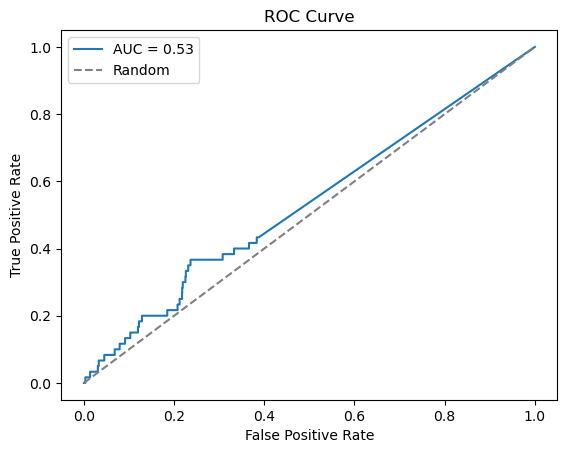

In [95]:
auc_roc = roc_auc_score(y, y_pred_tfidf)
print(f'AUC-ROC: {auc_roc:.3f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.3
y_binary = [1 if i >= threshold else 0 for i in y_pred_tfidf]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_tfidf)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Word2Vec

In [63]:
auc_roc = roc_auc_score(y, y_pred)
print(f'AUC-ROC: {auc_roc:.2f}')

AUC-ROC: 0.4914957339878448


Precision: 0.01059135039717564
Recall: 1.0
F1 Score: 0.02096069868995633


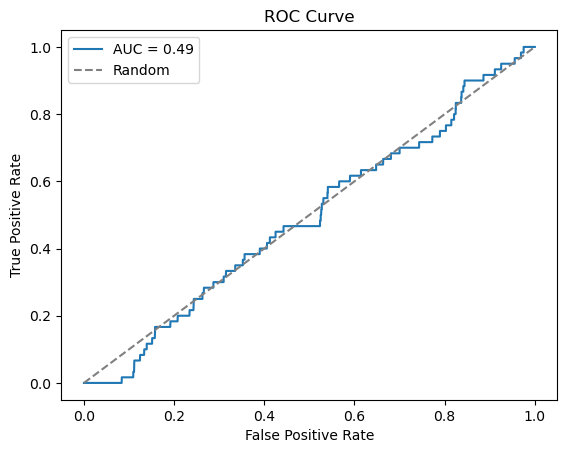

In [64]:
# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### FastText

AUC-ROC: 0.46708742402992054
Precision: 0.010323159784560144
Recall: 0.7666666666666667
F1 Score: 0.02037201062887511


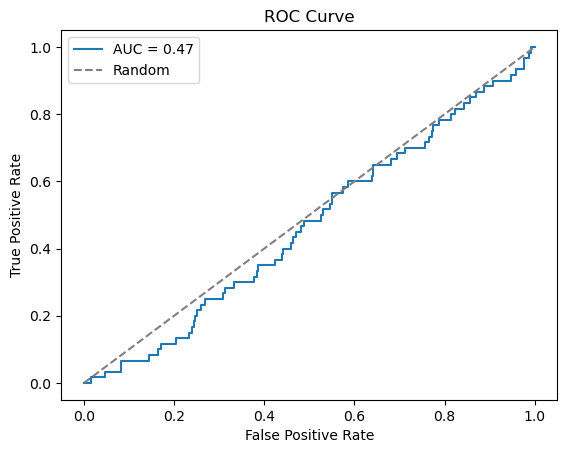

In [66]:
auc_roc = roc_auc_score(y, y_pred_ft)
print(f'AUC-ROC: {auc_roc:.2f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred_ft]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_ft)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Dostoevsky+BERT

AUC-ROC: 0.455
Precision: 0.007
Recall: 0.233
F1 Score: 0.013


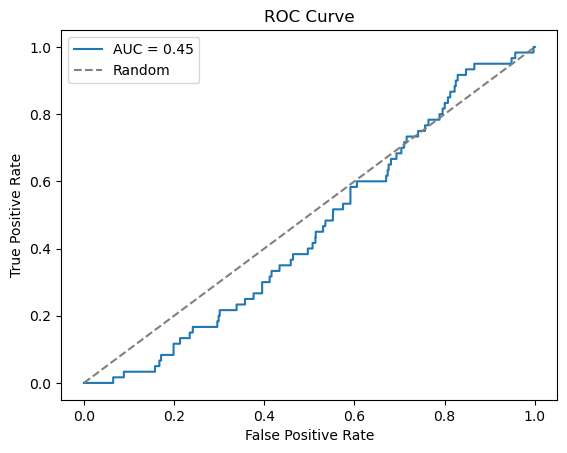

In [81]:
auc_roc = roc_auc_score(y, y_pred_dt)
print(f'AUC-ROC: {auc_roc:.3f}')

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_binary = [1 if i >= threshold else 0 for i in y_pred_dt]

# Calculate precision, recall, and F1 score
precision = precision_score(y, y_binary)
recall = recall_score(y, y_binary)
f1 = f1_score(y, y_binary)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_dt)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Будем оценивать качество моделей по 4 метрикам:
1. Площадь под кривой ROC
2. Точность (Precision)
3. Полнота (Recall)
4. F1-мера

Реузультаты представлены в таблице

In [91]:
vocab = {'auc_roc': [0.533, 0.491, 0.467, 0.455],
         'precision': [0.021, 0.011, 0.010, 0.007],
         'recall': [0.067, 1.000, 0.767, 0.233],
         'f1_score': [0.031, 0.021, 0.020, 0.013]}

compare_df = pd.DataFrame(vocab, index=['tf-idf', 'word2vec', 'fasttext', 'dostoevsky+rubert'])
#compare_df.columns.name = 'метрики'
#compare_df.index.name = 'модели'
compare_df

,auc_roc,precision,recall,f1_score
tf-idf,0.533,0.021,0.067,0.031
word2vec,0.491,0.011,1.000,0.021
fasttext,0.467,0.010,0.767,0.020
dostoevsky+rubert,0.455,0.007,0.233,0.013


## Кластеризация

## K-means and GMM

In [236]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [237]:
X = np.array(embeddings_w2v)

TSNE для визуализации

In [238]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [239]:
X_tsne

array([[-29.347088,  -9.853154],
       [ -9.032245, -20.663198],
       [-62.647778, -15.136909],
       ...,
       [ 67.408615,  -5.955772],
       [-10.38167 ,   0.714559],
       [ 10.860157,   4.025878]], dtype=float32)

кластеризация с GMM

In [242]:
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=43)
labels_gmm = gmm.fit_predict(X)

In [243]:
df_tsne_gmm = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne_gmm['cluster_gmm'] = labels_gmm

In [250]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

In [251]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['cluster_kmeans'] = labels_kmeans

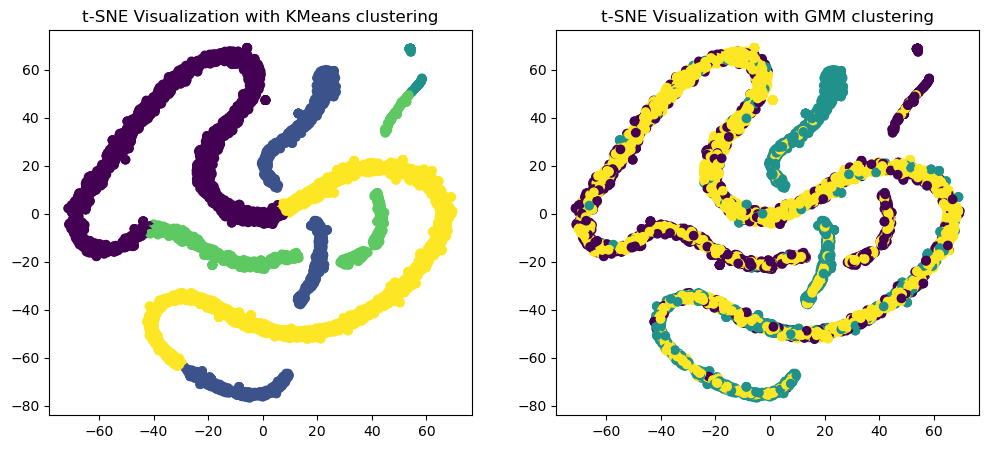

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df_tsne['tsne_1'], df_tsne['tsne_2'], c=df_tsne['cluster_kmeans'], cmap='viridis')
ax1.set_title('t-SNE Visualization with KMeans clustering')

ax2.scatter(df_tsne_gmm['tsne_1'], df_tsne_gmm['tsne_2'], c=df_tsne_gmm['cluster_gmm'], cmap='viridis')
ax2.set_title('t-SNE Visualization with GMM clustering')
plt.show()

## FastText

In [273]:
X_ft = np.array(embeddings_ft)


In [274]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne_ft = tsne.fit_transform(X_ft)

/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pratappokkharel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [275]:
X_tsne_ft

array([[ 10.084396 ,  17.990467 ],
       [  7.2291307,  25.110794 ],
       [ 19.18576  ,   3.603309 ],
       ...,
       [-29.010881 ,  31.223106 ],
       [ 11.206511 ,  -7.659853 ],
       [-10.545211 ,  12.01351  ]], dtype=float32)

In [284]:
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=43)
labels_gmm_ft = gmm.fit_predict(X_ft)

In [285]:
df_tsne_gmm_ft = pd.DataFrame(X_tsne_ft, columns=['tsne_1', 'tsne_2'])
df_tsne_gmm_ft['cluster_gmm'] = labels_gmm_ft

In [286]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans_ft = kmeans.fit_predict(X_ft)

In [288]:
df_tsne_ft = pd.DataFrame(X_tsne_ft, columns=['tsne_1', 'tsne_2'])
df_tsne_ft['cluster_kmeans'] = labels_kmeans_ft

In [297]:
list(df_tsne_ft["cluster_kmeans"])

[1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 3,
 1,
 2,
 1,
 3,
 0,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 0,
 1,
 0,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 3,
 3,
 3,
 0,
 3,
 1,
 3,
 2,
 0,
 4,
 0,
 0,
 3,
 3,
 3,
 4,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 4,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 3,
 2,
 3,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 3,
 3,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 0,
 3,
 2,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 1,
 3,


In [300]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for i in range(n_components):
    ax1.scatter(df_tsne_ft[df_tsne_ft['cluster_kmeans']==i]['tsne_1'], df_tsne_ft[df_tsne_ft['cluster_kmeans']==i['tsne_2'], c=df_tsne_ft['cluster_kmeans'], label=f'class={i}', cmap='viridis')
ax1.set_title('t-SNE Visualization with KMeans clustering')
ax1.legend()

ax2.scatter(df_tsne_gmm_ft['tsne_1'], df_tsne_gmm_ft['tsne_2'], c=df_tsne_gmm_ft['cluster_gmm'], cmap='viridis')
ax2.set_title('t-SNE Visualization with GMM clustering')
ax2.legend()
plt.show()

SyntaxError: invalid syntax (226071130.py, line 3)

In [205]:
def plot_tsne(class_number, result, class_pred):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    X_embedded = TSNE(n_components=2, random_state=0, learning_rate='auto',  init='random', perplexity=5).fit_transform(result)
    colors = ['r', 'b', 'g', 'y','k']
    for i in range(class_number):
        ax.scatter(X_embedded[class_pred==i][:,0], X_embedded[class_pred==i][:,1], c=colors[i], label=f'class = {i}')
    #plt.scatter(X_embedded[pred==0][:,0], X_embedded[pred==0][:,1])
    ax.legend()
    return ax, fig, X_embedded